In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


BEFORE:



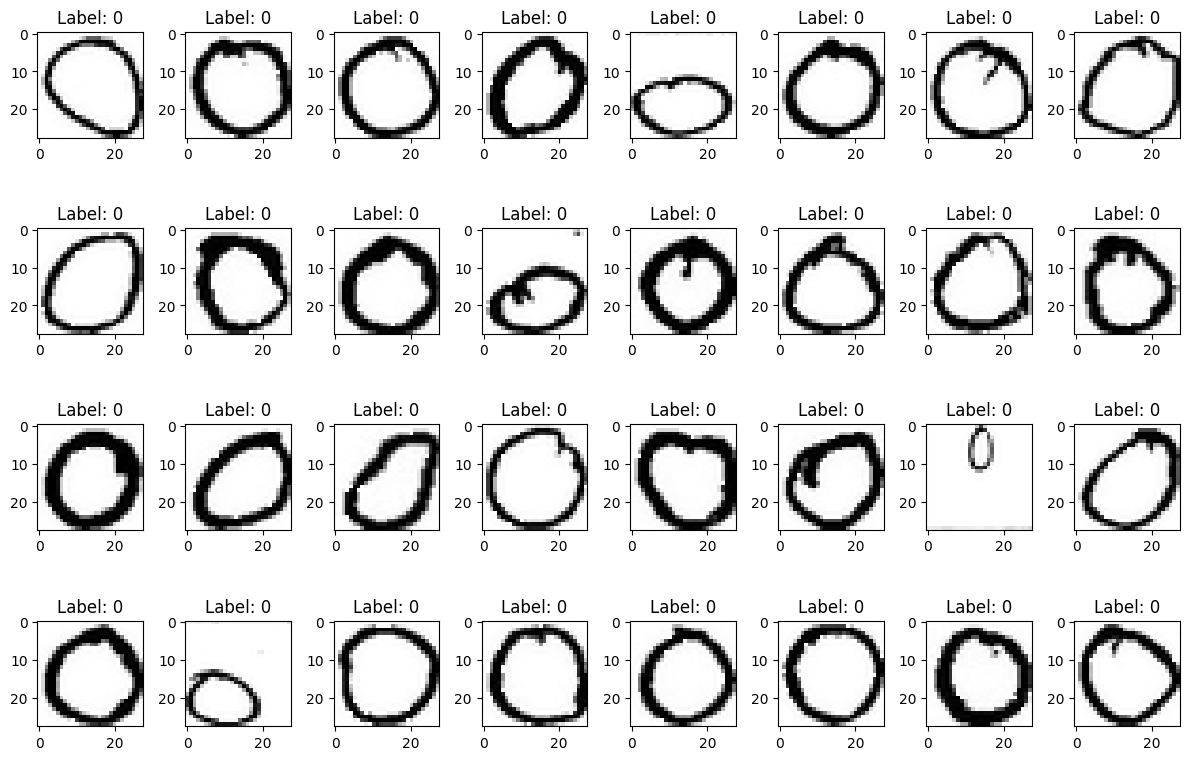

AFTER:



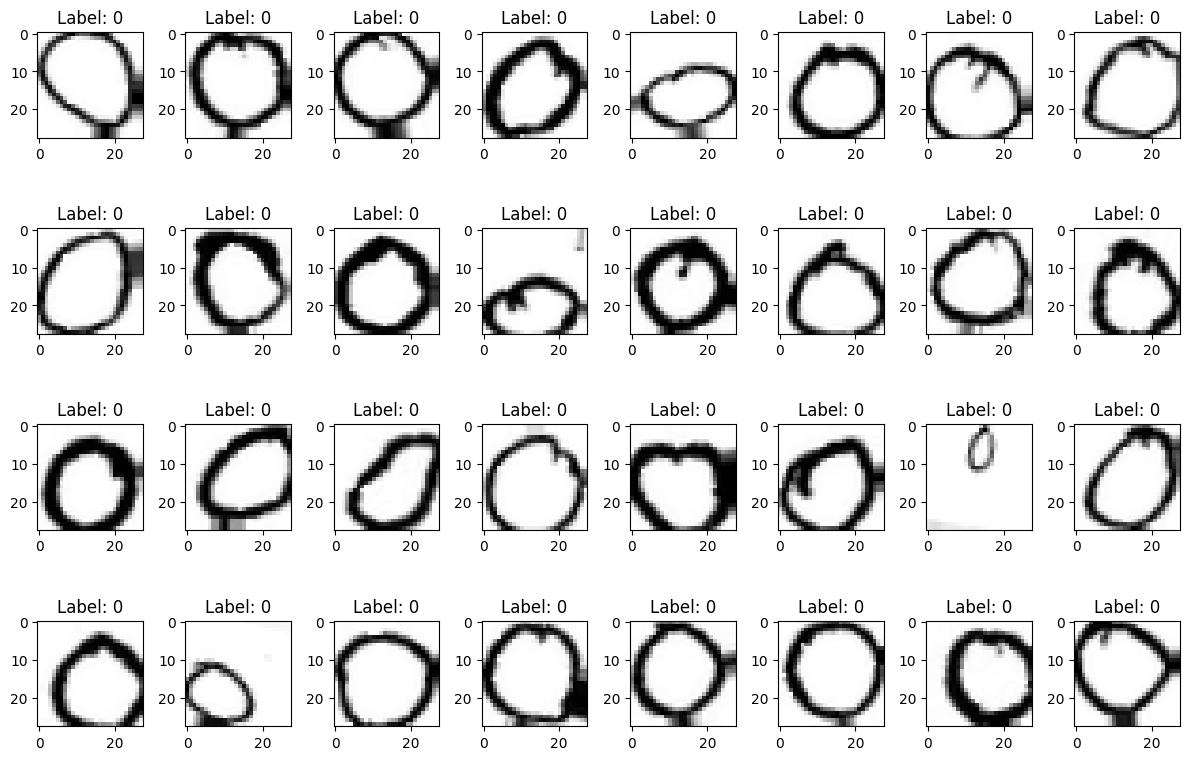

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

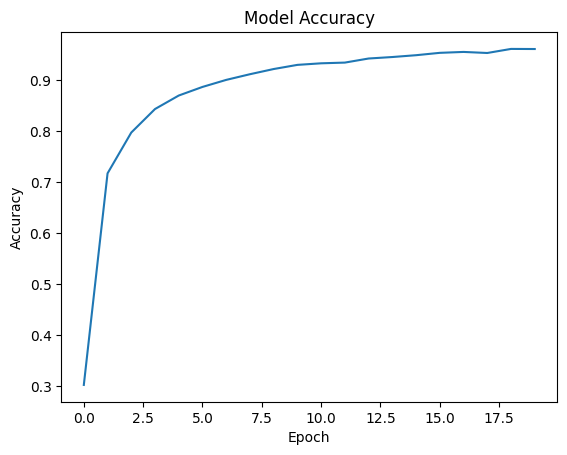

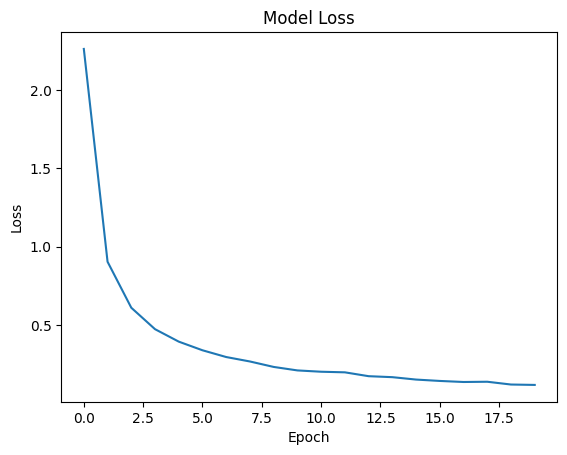

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data from CSV file
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Digit.csv')

# Extract image data and labels from the CSV columns (adjust column names as per your CSV file)
train_images = data.drop('label', axis=1).values
train_labels = data['label'].values

# Reshape image data to match the expected shape by the convolutional layers
train_images = train_images.reshape(-1, 28, 28, 1)

# Normalize image data
train_images = train_images / 255.0

# Specify the arguments
rotation_range_val = 15
width_shift_val = 0.10
height_shift_val = 0.10

# Create the data augmentation generator
train_datagen = ImageDataGenerator(
    rotation_range=rotation_range_val,
    width_shift_range=width_shift_val,
    height_shift_range=height_shift_val
)

# Fit the generator to the data
train_datagen.fit(train_images)

# Define number of rows & columns for plotting
num_row = 4
num_col = 8
num = num_row * num_col

# Plot before augmentation
print('BEFORE:\n')
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5 * num_col, 2 * num_row))
for i in range(num):
    ax = axes1[i // num_col, i % num_col]
    ax.imshow(train_images[i], cmap='gray_r')
    ax.set_title('Label: {}'.format(train_labels[i]))
plt.tight_layout()
plt.show()

# Plot after augmentation
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5 * num_col, 2 * num_row))
for X, Y in train_datagen.flow(train_images, train_labels, batch_size=num, shuffle=False):
    for i in range(0, num):
        ax = axes2[i // num_col, i % num_col]
        ax.imshow(X[i].reshape(28, 28), cmap='gray_r')
        ax.set_title('Label: {}'.format(int(Y[i])))
    break
plt.tight_layout()
plt.show()

# Model architecture and compilation
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(62, activation='softmax')
])
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_datagen.flow(train_images, train_labels, batch_size=1024),
    epochs=20
)

# Plot accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [ ]:
# Plot accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

NameError: ignored

In [ ]:
!pip install tensorflowjs


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, "/content/drive/MyDrive/Colab Notebooks/webapp")

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/Colab Notebooks/EMNIST js Model/model_v2.h5')